# Dimensionality Reduction Using PCA and LDA

# Challenge Session


### TAsk 1

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from ipywidgets import interact
import ipywidgets as widgets
import seaborn as sns


### Loading Data

In [3]:
#loading the data
df = pd.read_csv('/content/DS2_C6_S5_Insurance_Data_Challenge.csv')





In [4]:
# Checking for null value in each column
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Converting non numeric labeled column into categorical column
insur_df=df
insur_df['sex']=insur_df['sex'].astype('category')
insur_df['smoker']=insur_df['smoker'].astype('category')
insur_df['region']=insur_df['region'].astype('category')


#income_df.head()
print(insur_df.dtypes)


age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object


#Converting the column age and bmi into category using bins



# Since the original dataset has all the columns as numerical, the age and bmi column is converted to categorical by using bin intervals. 

### 1.Underweight: Less than 18.5. 2.Optimum range: 18.5 to 24.9. 3.Overweight: 25 to 29.9. 4. Obese >30.

The left bin edge will be exclusive and the right bin edge will be inclusive. i.e(25,29.9)

In [7]:
insur_df['bmi_labels'] = pd.cut(x=insur_df['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight','Obese'])

In [8]:
insur_df['age_labels'] = pd.cut(x=insur_df['age'], bins=[0, 17, 30, 50, 100], labels=['Minor', 'young', 'Middle Aged','Senior Citizens'])

In [9]:
insur_df

,age,sex,bmi,children,smoker,region,charges,bmi_labels,age_labels
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,young
1,18,male,33.770,1,no,southeast,1725.55230,Obese,young
2,28,male,33.000,3,no,southeast,4449.46200,Obese,young
3,33,male,22.705,0,no,northwest,21984.47061,Normal,Middle Aged
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,Middle Aged
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obese,Middle Aged
1334,18,female,31.920,0,no,northeast,2205.98080,Obese,young
1335,18,female,36.850,0,no,southeast,1629.83350,Obese,young
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight,young


In [10]:
insur_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Here, insurance charges are highly coreelated with age and then bmi in the respective order 

In [11]:
# Using Label Encoder technique to convert categorical column into numerical type
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
insur_df['sex_encode']= label_encoder.fit_transform(insur_df['sex'])
insur_df['sex_encode'].unique()

insur_df['bmi_encode']= label_encoder.fit_transform(insur_df['bmi_labels'])
insur_df['bmi_encode'].unique()

insur_df['age_encode']= label_encoder.fit_transform(insur_df['age_labels'])
insur_df['age_encode'].unique()

insur_df['smoker_encode']= label_encoder.fit_transform(insur_df['smoker'])
insur_df['smoker_encode'].unique()

insur_df['region_encode']= label_encoder.fit_transform(insur_df['region'])
insur_df['region_encode'].unique()


array([3, 2, 1, 0])

In [12]:
insur_df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_labels,age_labels,sex_encode,bmi_encode,age_encode,smoker_encode,region_encode
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,young,0,2,2,1,3
1,18,male,33.770,1,no,southeast,1725.55230,Obese,young,1,1,2,0,2
2,28,male,33.000,3,no,southeast,4449.46200,Obese,young,1,1,2,0,2
3,33,male,22.705,0,no,northwest,21984.47061,Normal,Middle Aged,1,0,0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,Middle Aged,1,2,0,0,1


In [13]:
# Defining method to perform data scaling operation based on the type of scaling
def feature_scale(scale):
 numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
 new_insur_df = insur_df.select_dtypes(include=numerics)
 if scale == 'minmax':
     scaler = MinMaxScaler()
 else:
     scaler = StandardScaler()
 df_scaled = pd.DataFrame(scaler.fit_transform(new_insur_df.to_numpy()),columns=new_insur_df.columns)
 return df_scaled

In [14]:
# scaling the data using MinMax Scaling process
scale = 'minmax' 
insur_df_scaled=feature_scale(scale)
insur_df_scaled.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_encode', 'bmi_encode',
       'age_encode', 'smoker_encode', 'region_encode'],
      dtype='object')

In [15]:
insur_df_scaled.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_encode', 'bmi_encode',
       'age_encode', 'smoker_encode', 'region_encode'],
      dtype='object')

# performing minmax normalization to scale the data

### Task 2

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            1338 non-null   int64   
 1   sex            1338 non-null   category
 2   bmi            1338 non-null   float64 
 3   children       1338 non-null   int64   
 4   smoker         1338 non-null   category
 5   region         1338 non-null   category
 6   charges        1338 non-null   float64 
 7   bmi_labels     1338 non-null   category
 8   age_labels     1338 non-null   category
 9   sex_encode     1338 non-null   int64   
 10  bmi_encode     1338 non-null   int64   
 11  age_encode     1338 non-null   int64   
 12  smoker_encode  1338 non-null   int64   
 13  region_encode  1338 non-null   int64   
dtypes: category(5), float64(2), int64(7)
memory usage: 101.6 KB


1. Analyzing the smoking habit among different features of policy holders

[Text(0.5, 1.0, 'Age vs charges)')]

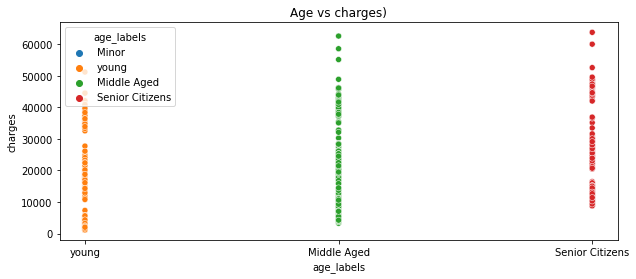

In [17]:
#Age and charges
plt_1 = plt.figure(figsize=(10, 4))
sns.scatterplot(x="age_labels", y='charges', hue='age_labels',data=insur_df).set(title='Age vs charges)')

#This bar chart helps to understand the smoking habits gender wise


### The plot shows the varying charges based on the age category. The senior citizens charges starts from 10000

[Text(0.5, 1.0, 'BMI vs charges')]

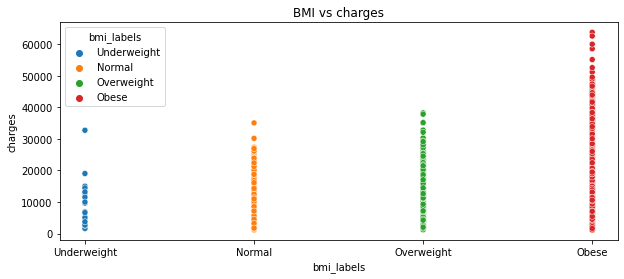

In [18]:
#bmi and charges
plt_1 = plt.figure(figsize=(10, 4))
sns.scatterplot(x="bmi_labels", y='charges',hue='bmi_labels', data=insur_df).set(title='BMI vs charges')

### The plot shows that the premium for obese persons is more compared to other bmi categories

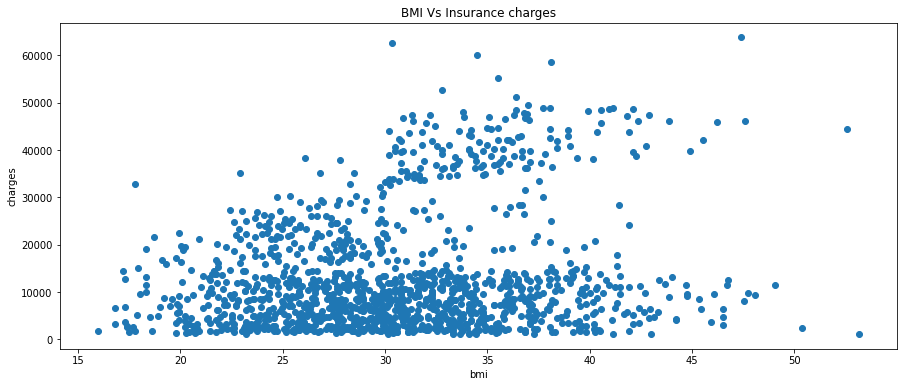

In [19]:
#bmi and smoker
plt1 = plt.figure(figsize=(15, 6))
plt.scatter(insur_df['bmi'], insur_df['charges'])
plt.title('BMI Vs Insurance charges')
plt.xlabel("bmi")
plt.ylabel("charges")
plt.show()

#The scatter plot of bmi and ages clearly shows that the charges are high for the population whose bmi>30.
#Also it gives us the distribution of data in the dataset that majority of thr policy holders are in the age group of 23-35

In [20]:
#df_s = pd.DataFrame()
#df_s[['bmi_labels','charges']]=insur_df[['bmi_labels','charges']].to_numpy()
#df_s
#df2[['date', 'hour']] = df1[['date', 'hour']].to_numpy()

#https://stackoverflow.com/questions/45747589/copying-a-column-from-one-dataframe-to-another-gives-nan-values
#g = sns.pairplot()

#g = sns.pairplot(iris, vars=["sepal_width", "sepal_length"])
#PAIRPLOT FOR ONLY 2 COLUMNS

[Text(0.5, 1.0, 'Sex vs smoker')]

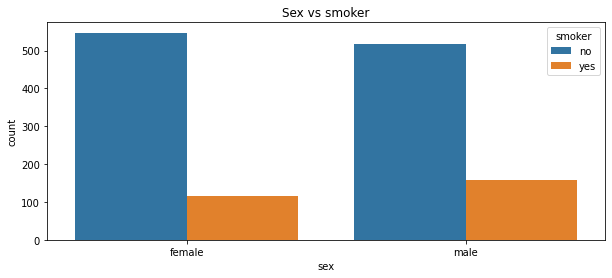

In [21]:
#gender and smoker
plt_1 = plt.figure(figsize=(10, 4))
sns.countplot(x="sex", hue="smoker", data=df).set(title='Sex vs smoker')

Gives the distribution of the smoking habit among the different genders- Male and female

[Text(0.5, 1.0, 'Region vs Smoker')]

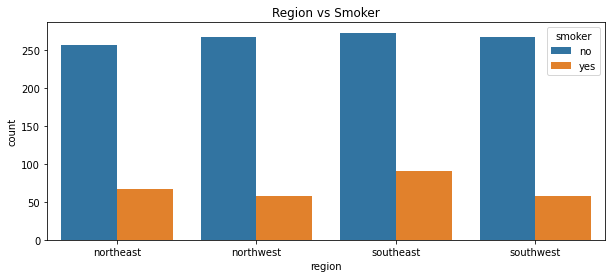

In [22]:
#region and smoker
plt_1 = plt.figure(figsize=(10, 4))
sns.countplot(x="region", hue="smoker", data=df).set(title='Region vs Smoker')

# Gives the regionwise distribution of smoking behavior. Theree is no much diffrence seen anong the regions. A large population does not have smoking habits

[Text(0.5, 1.0, 'Children vs Smoker')]

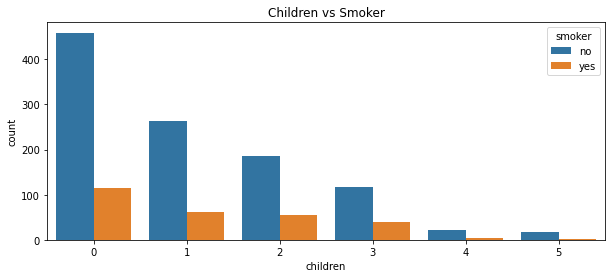

In [24]:
#no.of children and smoker
plt_1 = plt.figure(figsize=(10, 4))
sns.countplot(x="children", hue="smoker", data=df).set(title='Children vs Smoker')

#hue-->Variable in data to map plot aspects to different colors.

# The plot shows the non-smoking population is having more children compared to those with the habit

[Text(0.5, 1.0, 'Region vs charges')]

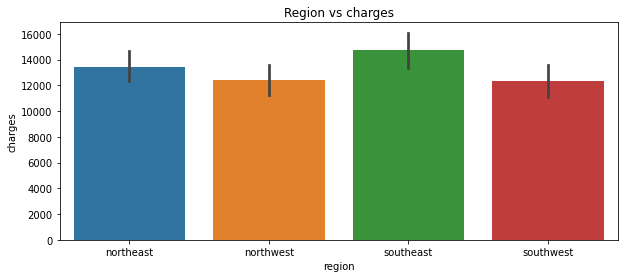

In [25]:
#Distribution of charges and region

plt_1 = plt.figure(figsize=(10, 4))
sns.barplot(x="region", y="charges", data=df).set(title='Region vs charges')

# This shows the south east region is having high premium payers

[Text(0.5, 1.0, 'Gender VS charges')]

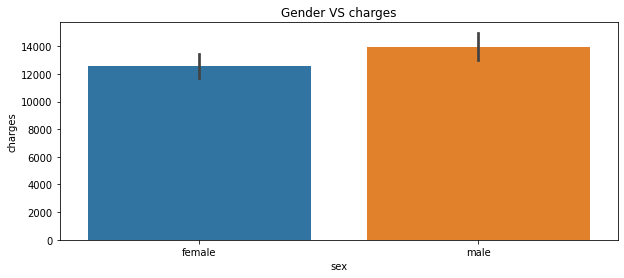

In [26]:
#Distribution of charges and gender
plt_1 = plt.figure(figsize=(10, 4))
sns.barplot(x="sex",y='charges', data=df).set(title='Gender VS charges')

# Considering the gender wise data, males are paying high premium then female

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            1338 non-null   int64   
 1   sex            1338 non-null   category
 2   bmi            1338 non-null   float64 
 3   children       1338 non-null   int64   
 4   smoker         1338 non-null   category
 5   region         1338 non-null   category
 6   charges        1338 non-null   float64 
 7   bmi_labels     1338 non-null   category
 8   age_labels     1338 non-null   category
 9   sex_encode     1338 non-null   int64   
 10  bmi_encode     1338 non-null   int64   
 11  age_encode     1338 non-null   int64   
 12  smoker_encode  1338 non-null   int64   
 13  region_encode  1338 non-null   int64   
dtypes: category(5), float64(2), int64(7)
memory usage: 101.6 KB


In [28]:
#X, y = insur_df_scaled.iloc[:,:-1], insur_df_scaled.iloc[:,-1]

#having the features and target into X and Y
X1=df[['age','children','sex_encode','smoker_encode','region_encode','charges']]
y1=df['bmi_encode']

# In the dataset, no categorical column is present.
#So, the bmi column has been converted into bins and labels assigned.
# bmi_labels column is taken as the target variable and other varibles 
#taken as features in the dataset

### Task 2

### Dimensionality reduction using PCA and LDA

In [29]:

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#PCA
pca = PCA(n_components=2)
X_r = pca.fit(X1).transform(X1)
explained_variance = pca.explained_variance_ratio_
explained_variance

#LDA
#supervised reduction technique
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X1, y1).transform(X1)

In [30]:
#df1=insur_df_scaled

In [31]:
df1=df[['age','children','charges','sex_encode','bmi_encode','smoker_encode','region_encode']]

### Task 3

### K means clustering

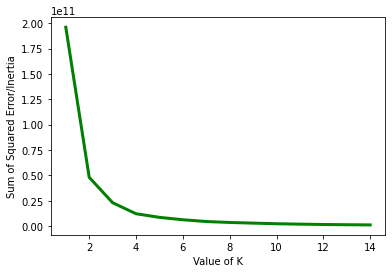

In [48]:
#Finding optimal value of k
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X1)
    # calculates squared error
    # for the clustered points
    Sum_of_squared_distances.append(km.inertia_)
     
# plot the cost against K values
plt.plot(K, Sum_of_squared_distances, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Sum of Squared Error/Inertia")
plt.show()

Taking k=4 from the graph

# MOdelling using K means
#k=4 here

# without Dimensionality reduction

In [49]:
Kmeans_model_wo = KMeans(n_clusters=4)
Kmeans_model_wo.fit(X1)

#X1 contains the features

KMeans(n_clusters=4)

In [50]:
c=Kmeans_model_wo.labels_

Text(0, 0.5, 'Insurance charges')

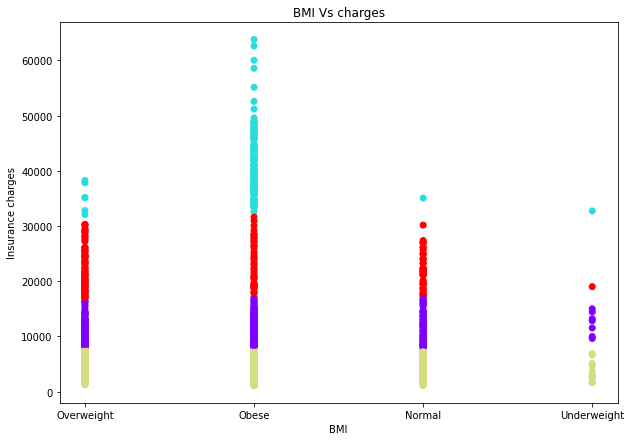

In [73]:
plt.figure(figsize=(10, 7))

plt.scatter(x=insur_df['bmi_labels'],y=X1['charges'], c=Kmeans_model_wo.labels_, cmap='rainbow')
plt.title('BMI Vs charges')
plt.xlabel('BMI')
plt.ylabel('Insurance charges')

#here c denotes a scalar 
#or sequence of n numbers to be mapped to colors using cmap

The plot shows under each category, how the premium amount is varying. 
For instance, the majority of the obese ppl are paying more premium amount compared to others

In [37]:
### K means with Dimensionality reduction-PCA

In [52]:
Kmeans_model_w = KMeans(n_clusters=4)
Kmeans_model_w.fit(X_r)

KMeans(n_clusters=4)

Text(0.5, 1.0, 'Kmeans clustering on PCA reduced components')

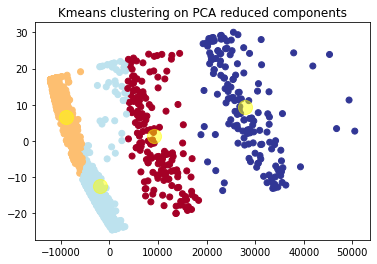

In [53]:
y=Kmeans_model_w.labels_
plt.scatter(X_r[:, 0], X_r[:, 1], c=y,cmap='RdYlBu')
centers = Kmeans_model_w.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5);
plt.title('Kmeans clustering on PCA reduced components')

The fig shows the clusters and the cluster centers using PCA features

#### Using DBSCAN Clustering Algorithm

Text(0, 0.5, 'Epsilon')

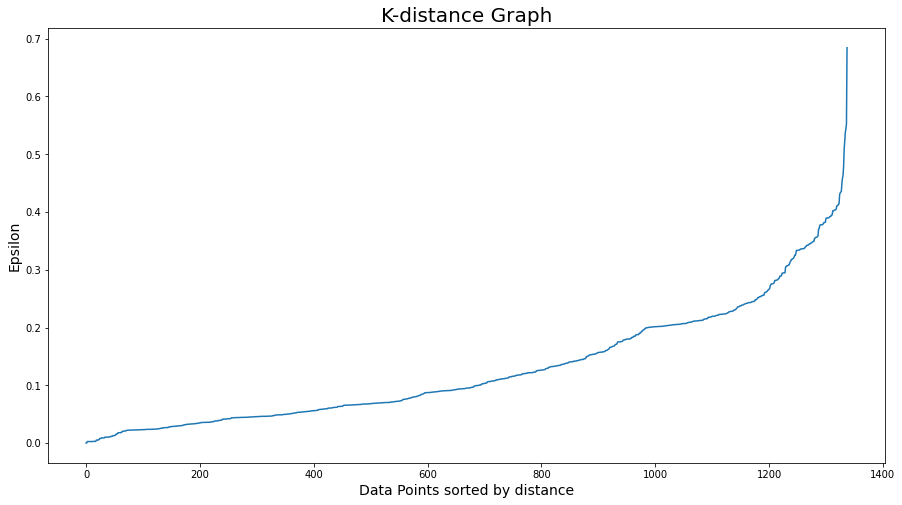

In [88]:
#finding optimal value of eps and min points

from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(insur_df_scaled)
distances, indices = nbrs.kneighbors(insur_df_scaled)
# Plotting K-distance Graph
import numpy as np
distances = np.sort(distances, axis=0)
# distance variable contains an array of distances between a data point and rest of points
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
#plt.axhline(y=0.075, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)

In [92]:

eps=0.4
K=range(3,20)
for min_samples in K:
  clusterer = DBSCAN(eps=eps, min_samples=min_samples)
  cluster_labels = clusterer.fit_predict(insur_df_scaled)
  x= cluster_labels +2
  y = np.bincount(x)
  ii = np.nonzero(y)[0]
  results = list(zip(ii,y[ii]) )
  #print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', (results))
  print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', len(results))

eps= 0.4 | min_samples=  3 | obtained clustering:  27
eps= 0.4 | min_samples=  4 | obtained clustering:  24
eps= 0.4 | min_samples=  5 | obtained clustering:  22
eps= 0.4 | min_samples=  6 | obtained clustering:  19
eps= 0.4 | min_samples=  7 | obtained clustering:  17
eps= 0.4 | min_samples=  8 | obtained clustering:  16
eps= 0.4 | min_samples=  9 | obtained clustering:  14
eps= 0.4 | min_samples=  10 | obtained clustering:  14
eps= 0.4 | min_samples=  11 | obtained clustering:  11
eps= 0.4 | min_samples=  12 | obtained clustering:  11
eps= 0.4 | min_samples=  13 | obtained clustering:  10
eps= 0.4 | min_samples=  14 | obtained clustering:  10
eps= 0.4 | min_samples=  15 | obtained clustering:  9
eps= 0.4 | min_samples=  16 | obtained clustering:  9
eps= 0.4 | min_samples=  17 | obtained clustering:  7
eps= 0.4 | min_samples=  18 | obtained clustering:  7
eps= 0.4 | min_samples=  19 | obtained clustering:  7


In [87]:
insur_df_scaled.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_encode', 'bmi_encode',
       'age_encode', 'smoker_encode', 'region_encode'],
      dtype='object')

In [95]:
#DBSCAN without Dim Reduction
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.2,min_samples=10)
dbscan.fit(insur_df_scaled)

DBSCAN(eps=0.2, min_samples=10)

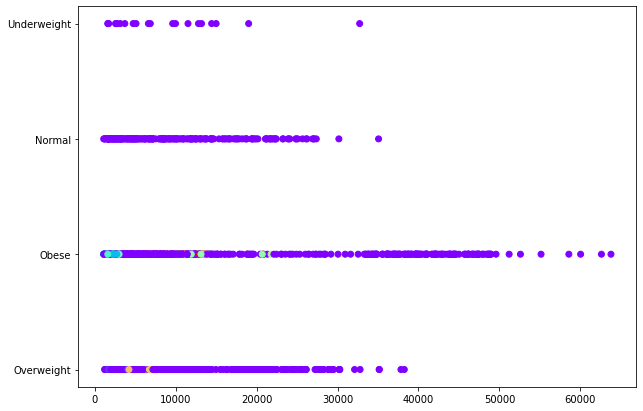

In [96]:
plt.figure(figsize=(10, 7))

plt.scatter(insur_df['charges'], insur_df['bmi_labels'], c=dbscan.labels_, cmap='rainbow')

The DBscan algorithm does not show the clusters clearly

In [97]:
# DBSCAN with Dim reduction-PCA
from sklearn.cluster import DBSCAN
dbscan1=DBSCAN(eps=0.2,min_samples=6)
dbscan1.fit(X_r)

DBSCAN(eps=0.2, min_samples=6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


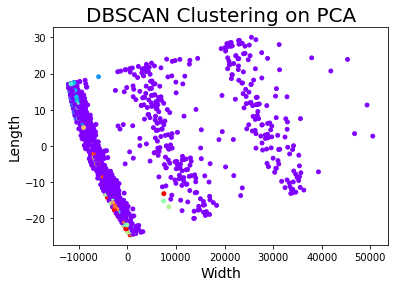

In [98]:
X1['DBSCAN_labels']=dbscan.labels_
# Plotting resulting clusters
plt.scatter(X_r[:,0], X_r[:,1],c=X1['DBSCAN_labels'],s=15,cmap='rainbow')

plt.title('DBSCAN Clustering on PCA',fontsize=20)
plt.xlabel('Width',fontsize=14)
plt.ylabel('Length',fontsize=14)
plt.show()

# The DBSCAN algorithm cannot model the data properly. The clusters are poorly formed

## Hierarchical clustering

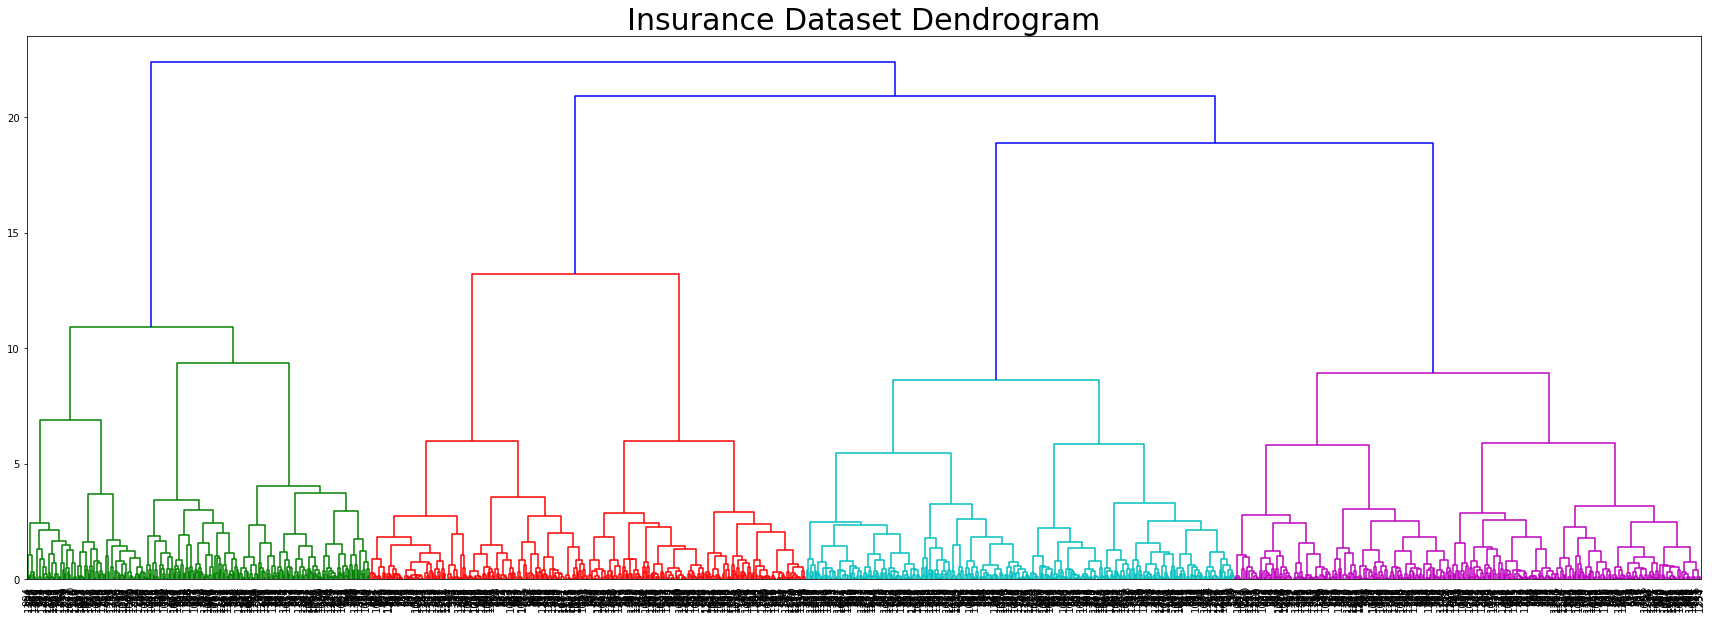

In [84]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering



plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(insur_df_scaled, method = 'ward'),labels=X1.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Insurance Dataset Dendrogram',fontsize=30)
#plt.xlabel('Car Sales',fontsize=20)
#plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

#without Dim Reduction

In [99]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(insur_df_scaled)

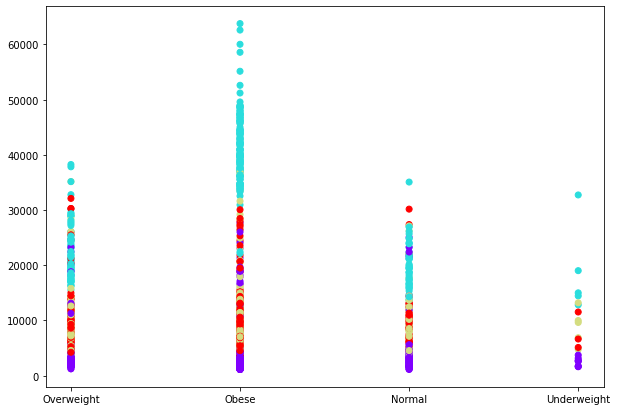

In [100]:
plt.figure(figsize=(10, 7))

plt.scatter(insur_df['bmi_labels'],insur_df['charges'], c=hc.labels_, cmap='rainbow')

#The clusters are mixed and are not grouped

## With Dim Reduction

In [101]:
hc1 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc1 = hc1.fit_predict(X_r)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


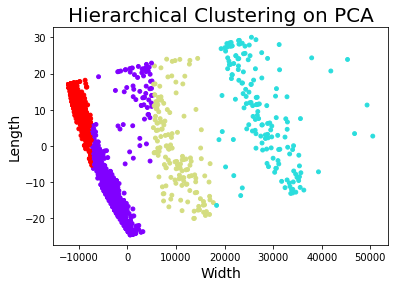

In [102]:
X1['hierarchical_labels']=hc1.labels_
# Plotting resulting clusters
plt.scatter(X_r[:, 0], X_r[:, 1],c=X1['hierarchical_labels'],s=15,cmap='rainbow')
plt.title('Hierarchical Clustering on PCA',fontsize=20)
plt.xlabel('Width',fontsize=14)
plt.ylabel('Length',fontsize=14)
plt.show()

# When using reduced features, the hierarchical clustering works good than using all the features 

#LDA and Clustering

#K-MEANS

Text(0.5, 1.0, 'Kmeans clustering on LDA reduced components')

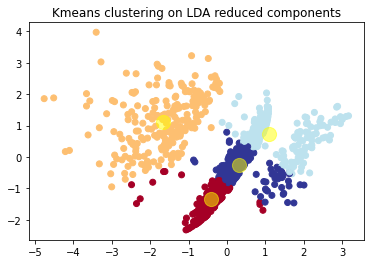

In [104]:
Kmeans_model_w = KMeans(n_clusters=4)
Kmeans_model_w.fit(X_r2)

y=Kmeans_model_w.labels_
plt.scatter(X_r2[:, 0], X_r2[:, 1], c=y,cmap='RdYlBu')
centers = Kmeans_model_w.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5);
plt.title('Kmeans clustering on LDA reduced components')

#HIERARCHICAL

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


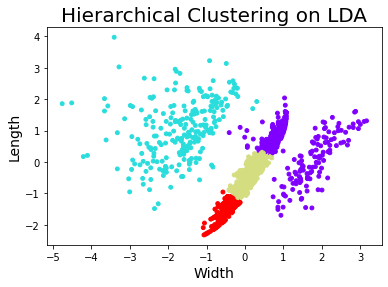

In [108]:
hc1 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc1 = hc1.fit_predict(X_r2)
X1['hierarchical_labels']=hc1.labels_
# Plotting resulting clusters
plt.scatter(X_r2[:, 0], X_r2[:, 1],c=X1['hierarchical_labels'],s=15,cmap='rainbow')
plt.title('Hierarchical Clustering on LDA',fontsize=20)
plt.xlabel('Width',fontsize=14)
plt.ylabel('Length',fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


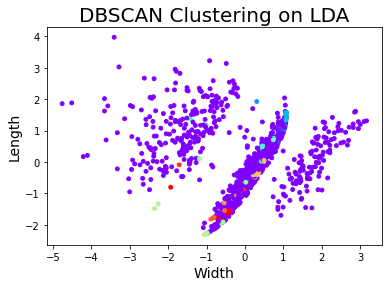

In [107]:

# DBSCAN with Dim reduction-LDA
from sklearn.cluster import DBSCAN
dbscan1=DBSCAN(eps=0.2,min_samples=6)
dbscan1.fit(X_r2)
X1['DBSCAN_labels']=dbscan.labels_
# Plotting resulting clusters
plt.scatter(X_r2[:,0], X_r2[:,1],c=X1['DBSCAN_labels'],s=15,cmap='rainbow')

plt.title('DBSCAN Clustering on LDA',fontsize=20)
plt.xlabel('Width',fontsize=14)
plt.ylabel('Length',fontsize=14)
plt.show()

# Inference

PCA seems to be more effective compared to LDA

When using PCA, K means is giving better formed clsuters than hierarchical and DBSCAN

It can be concluded K-means is effective for the given dataset with and without dimensionality reduction